<a href="https://colab.research.google.com/github/nimishp97/ml-minor/blob/main/MIN0R_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
mkdir images


mkdir: cannot create directory ‘images’: File exists


In [3]:
pip install bing-image-downloader

In [4]:
#Gather Data
from bing_image_downloader import downloader
downloader.download("man with beard",limit=50,output_dir='images',adult_filter_off=True)
downloader.download("man without beard",limit=50,output_dir='images',adult_filter_off=True)





[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-bonKokrfb-w/VpuSEgmGC1I/AAAAAAAAncw/okZaXiUYZDA/s1600/Alessandro-Manfredini-Beard-Grandpa-4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://hairstyleonpoint.com/wp-content/uploads/2014/11/tumblr_n4ywh87UD11rq5h24o1_500.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://menhairdos.com/wp-content/uploads/2019/07/30079230_1856621484401821_5268732022334947328_n.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.blankexit.com/wp-content/uploads/2014/08/30-Thats-one-long-tongue.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://thumbs.dreamstime.com/x/middle-aged-man-glasses-mustache-beard-caucasian-39675060.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.blankexit.com/wp-content/uploads/2014/08/20-Lizard-Man.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.newshub.co.nz/home/wo

<BarContainer object of 2 artists>


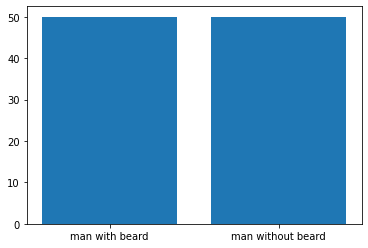

In [5]:
#Preprocess data

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['man with beard','man without beard']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

unique,count = np.unique(target,return_counts=True)
print(plt.bar(CATEGORIES,count))


In [6]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [7]:
#Applying Classification Algoritham SVM
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [{'C':[1,10,100,1000],'kernel':['linear']},{'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(y_pred)
print(y_test)

[1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0]
[1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1]


In [8]:
#Evaluation of the model using Confusion Matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.9333333333333333
[[13  2]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



This Model Classify Images Between Three Expression : 
1.man with beard
2.man without beard 
Enter URL for Expression Image : https://www.thetrendspotter.net/wp-content/uploads/2018/09/How-to-Fix-a-Patchy-Beard.jpg
(450, 800, 3)
Predicted Expression : man with beard


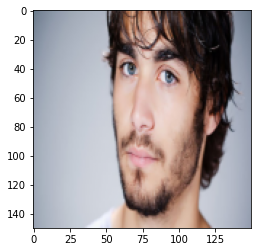

In [10]:
#Prediction for any new Image


import pickle
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

flat_data = []
url = input('This Model Classify Images Between Three Expression : \n1.man with beard\n2.man without beard \nEnter URL for Expression Image : ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
falt_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Predicted Expression : {y_out}')